# Wide and Deep Networks

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [5]:
tf.__version__

'2.17.0'

In [6]:
keras.__version__

'3.4.1'

In [7]:
california_housing = tf.keras.datasets.california_housing.load_data(
    version='large', path='california_housing.npz', test_split=0.2, seed=42
)
(X_train_full, y_train_full), (X_test, y_test) = california_housing

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [8]:
X_train_full.shape

(16512, 8)

In [9]:
X_test.shape

(4128, 8)

In [10]:
X_train, X_valid = X_train_full[:12000], X_train_full[12000:]
y_train, y_valid = y_train_full[:12000], y_train_full[12000:]

In [11]:
X_train.shape

(12000, 8)

In [13]:
X_valid.shape

(4512, 8)

In [21]:
X_train.shape[1:]

(8,)

## Just Deep

![](assets/just-deep.png)

In [48]:
tf.random.set_seed(42)

normalization_layer = tf.keras.layers.Normalization()
hidden_layer_1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer_2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer_1(normalized)
hidden2 = hidden_layer_2(hidden1)
output = output_layer(hidden2)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.compile(loss='mse', optimizer='Adam', metrics=['RootMeanSquaredError'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_10                │ (None, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

In [49]:
model.layers

[<InputLayer name=input_layer_12, built=True>,
 <Normalization name=normalization_10, built=True>,
 <Dense name=dense_24, built=True>,
 <Dense name=dense_25, built=True>,
 <Dense name=dense_26, built=True>]

In [50]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - RootMeanSquaredError: 219402.1875 - loss: 48315940864.0000 - val_RootMeanSquaredError: 162204.5312 - val_loss: 26310307840.0000
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - RootMeanSquaredError: 162245.0938 - loss: 26333542400.0000 - val_RootMeanSquaredError: 159078.3906 - val_loss: 25305933824.0000
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - RootMeanSquaredError: 158630.3906 - loss: 25172633600.0000 - val_RootMeanSquaredError: 154272.2812 - val_loss: 23799937024.0000
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - RootMeanSquaredError: 153080.9219 - loss: 23441471488.0000 - val_RootMeanSquaredError: 147118.2656 - val_loss: 21643786240.0000
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - RootMeanSquaredError: 145024.8594 - loss: 21038571520.0000 - val_RootMeanSquaredError: 137238.9688 - val_loss: 18834536448.0000
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - RootMeanSquaredError: 13

In [51]:
history_df = pd.DataFrame(history.history)
history_df

,RootMeanSquaredError,loss,val_RootMeanSquaredError,val_loss
0,196260.156250,3.851805e+10,162204.531250,2.631031e+10
1,161296.312500,2.601650e+10,159078.390625,2.530593e+10
2,157312.531250,2.474723e+10,154272.281250,2.379994e+10
3,151225.125000,2.286904e+10,147118.265625,2.164379e+10
4,142544.062500,2.031881e+10,137238.968750,1.883454e+10
5,131175.625000,1.720705e+10,125056.585938,1.563915e+10
6,118790.859375,1.411127e+10,113854.929688,1.296295e+10
7,109743.828125,1.204371e+10,107701.414062,1.159959e+10
8,105868.117188,1.120806e+10,105624.882812,1.115662e+10
9,104559.078125,1.093260e+10,104774.015625,1.097759e+10


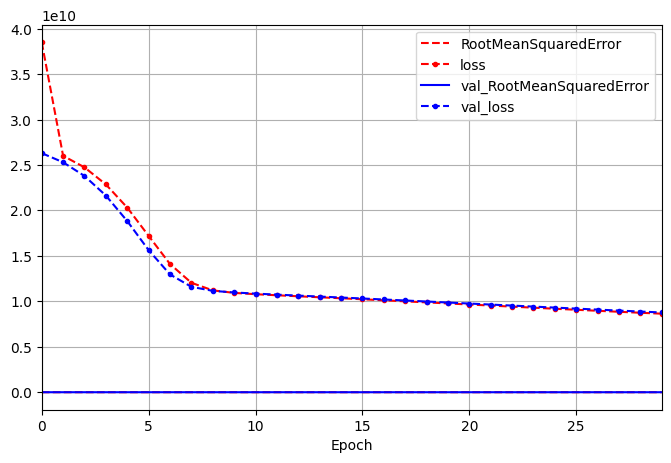

In [52]:
history_df.plot(
    figsize=(8, 5),
    xlim=[0, 29],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b--."],
)
plt.show()

In [53]:
model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - RootMeanSquaredError: 94450.2500 - loss: 8921778176.0000


[8900408320.0, 94341.9765625]

## Wide and Deep (1)

Lets force a NN to learn deep and complex concepts plus basic concepts

![](assets/wide-and-deep_1.png)

In [24]:
tf.random.set_seed(42)

normalization_layer = tf.keras.layers.Normalization()
hidden_layer_1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer_2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer_1(normalized)
hidden2 = hidden_layer_2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.compile(loss='mse', optimizer='Adam', metrics=['RootMeanSquaredError'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 8)         │         17 │ input_layer_5[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 30)        │        270 │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 30)        │        930 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 38)        │          0 │ normalization_5[… │
│ (Concatenate)       │                   │            │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │         39 │ concatenate_5[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [25]:
model.layers

[<InputLayer name=input_layer_5, built=True>,
 <Normalization name=normalization_5, built=True>,
 <Dense name=dense_15, built=True>,
 <Dense name=dense_16, built=True>,
 <Concatenate name=concatenate_5, built=True>,
 <Dense name=dense_17, built=True>]

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - RootMeanSquaredError: 221748.7500 - loss: 49352048640.0000 - val_RootMeanSquaredError: 162503.0156 - val_loss: 26407231488.0000
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - RootMeanSquaredError: 162613.5938 - loss: 26453217280.0000 - val_RootMeanSquaredError: 159880.0312 - val_loss: 25561626624.0000
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - RootMeanSquaredError: 159817.0000 - loss: 25550788608.0000 - val_RootMeanSquaredError: 156957.1094 - val_loss: 24635533312.0000
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - RootMeanSquaredError: 156628.3281 - loss: 24540940288.0000 - val_RootMeanSquaredError: 153297.2812 - val_loss: 23500058624.0000
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - RootMeanSquaredError: 152529.6094 - loss: 23272726528.0000 - val_RootMeanSquaredError: 148246.9688 - val_loss: 21977163776.0000
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - RootMeanSquaredError: 14

In [27]:
history_df = pd.DataFrame(history.history)
history_df

,RootMeanSquaredError,loss,val_RootMeanSquaredError,val_loss
0,198144.687500,3.926132e+10,162503.015625,2.640723e+10
1,161771.703125,2.617009e+10,159880.031250,2.556163e+10
2,158934.640625,2.526022e+10,156957.109375,2.463553e+10
3,155593.265625,2.420926e+10,153297.281250,2.350006e+10
4,151195.625000,2.286012e+10,148246.968750,2.197716e+10
5,144977.703125,2.101854e+10,140990.015625,1.987818e+10
6,136111.906250,1.852645e+10,130848.718750,1.712139e+10
7,124778.851562,1.556976e+10,119327.437500,1.423904e+10
8,113965.656250,1.298817e+10,110408.882812,1.219012e+10
9,107612.234375,1.158039e+10,106836.906250,1.141412e+10


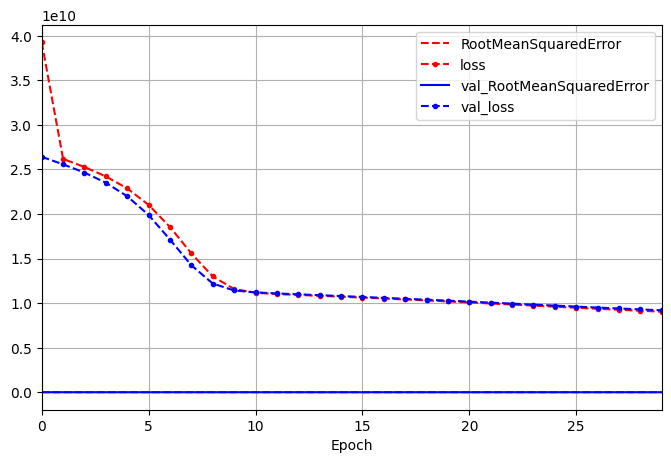

In [29]:
history_df.plot(
    figsize=(8, 5),
    xlim=[0, 29],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b--."],
)
plt.show()

In [30]:
model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - RootMeanSquaredError: 96261.3125 - loss: 9267324928.0000


[9334300672.0, 96614.1875]

In [31]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[206147.45],
       [163486.77],
       [205789.81]], dtype=float32)

## Wide and Deep (2)

What if part of the input we want to handle it as a simple concepts or patterns to learn and the rest of the inputs
should be analyzed and learned deeplier.

![](assets/wide-and-deep-multiple-inputs.png)

In [40]:
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

hidden_layer_1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer_2 = tf.keras.layers.Dense(30, activation='relu')

concat_layer = tf.keras.layers.Concatenate()

output_layer = tf.keras.layers.Dense(1)

normalized_wide = norm_layer_wide(input_wide)

normalized_deep = norm_layer_deep(input_deep)
hidden1 = hidden_layer_1(normalized_deep)
hidden2 = hidden_layer_2(hidden1)

concat = concat_layer([normalized_wide, hidden2])

output = output_layer(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.compile(loss='mse', optimizer='Adam', metrics=['RootMeanSquaredError'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_9     │ (None, 6)         │         13 │ input_layer_11[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 30)        │        210 │ normalization_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_8     │ (None, 5)         │         11 │ input_layer_10[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 30)        │        930 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 35)        │          0 │ normalization_8[… │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 1)         │         36 │ concatenate_7[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [41]:
model.layers

[<InputLayer name=input_layer_11, built=True>,
 <Normalization name=normalization_9, built=True>,
 <InputLayer name=input_layer_10, built=True>,
 <Dense name=dense_21, built=True>,
 <Normalization name=normalization_8, built=True>,
 <Dense name=dense_22, built=True>,
 <Concatenate name=concatenate_7, built=True>,
 <Dense name=dense_23, built=True>]

In [42]:
X_train_wide.shape

(12000, 5)

In [43]:
X_train_deep.shape

(12000, 6)

In [44]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

X_train_joined = (X_train_wide, X_train_deep)
X_valid_joined = (X_valid_wide, X_valid_deep)

history = model.fit(X_train_joined, y_train, epochs=30, validation_data=(X_valid_joined, y_valid))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - RootMeanSquaredError: 236916.3125 - loss: 56130854912.0000 - val_RootMeanSquaredError: 236614.9844 - val_loss: 55986651136.0000
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - RootMeanSquaredError: 236170.0312 - loss: 55777824768.0000 - val_RootMeanSquaredError: 234084.5000 - val_loss: 54795550720.0000
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - RootMeanSquaredError: 232752.3750 - loss: 54175629312.0000 - val_RootMeanSquaredError: 227786.8906 - val_loss: 51886866432.0000
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - RootMeanSquaredError: 225361.0000 - loss: 50790760448.0000 - val_RootMeanSquaredError: 217200.5469 - val_loss: 47176077312.0000
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - RootMeanSquaredError: 213745.9844 - loss: 45692395520.0000 - val_RootMeanSquaredError: 202821.4688 - val_loss: 41136545792.0000
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - RootMeanSquaredError: 19

In [45]:
history_df = pd.DataFrame(history.history)
history_df

,RootMeanSquaredError,loss,val_RootMeanSquaredError,val_loss
0,236545.796875,5.595392e+10,236614.984375,5.598665e+10
1,235290.843750,5.536178e+10,234084.500000,5.479555e+10
2,230974.562500,5.334925e+10,227786.890625,5.188687e+10
3,222555.500000,4.953095e+10,217200.546875,4.717608e+10
4,210019.765625,4.410830e+10,202821.468750,4.113655e+10
5,194326.140625,3.776265e+10,186055.531250,3.461666e+10
6,177129.265625,3.137478e+10,168720.937500,2.846675e+10
7,160189.359375,2.566063e+10,152475.171875,2.324868e+10
8,145084.296875,2.104945e+10,138797.687500,1.926480e+10
9,133138.984375,1.772599e+10,128700.578125,1.656384e+10


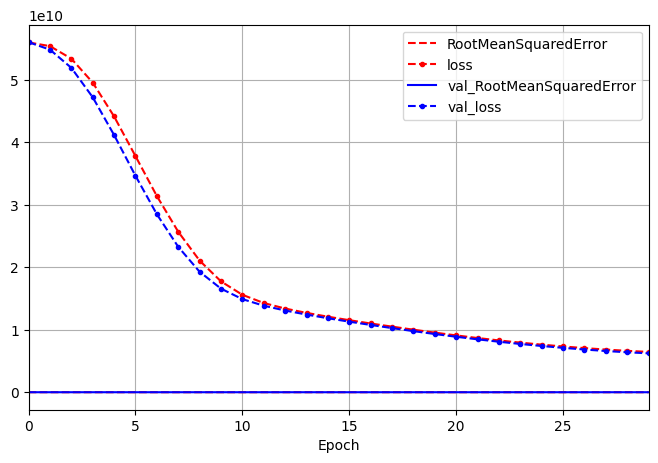

In [46]:
history_df.plot(
    figsize=(8, 5),
    xlim=[0, 29],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b--."],
)
plt.show()

In [47]:
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_test_joined = (X_test_wide, X_test_deep)
model.evaluate(X_test_joined, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - RootMeanSquaredError: 82575.7031 - loss: 6826023424.0000


[6683158528.0, 81750.5859375]